In [1]:
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as py
from tensorflow.keras import layers

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

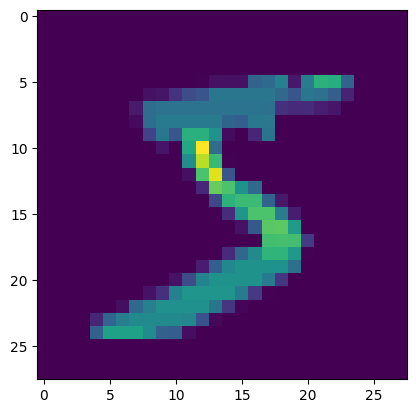

In [3]:
py.imshow(x_train[0])

In [4]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
model=tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10),
    layers.Activation("softmax")
    ])

In [6]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [8]:
model.fit(
    x_train,
    y_train,
    epochs=3 
)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3074 - accuracy: 0.9135
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9589
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0986 - accuracy: 0.9701


In [9]:
_,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(accuracy*100)

96.72999978065491


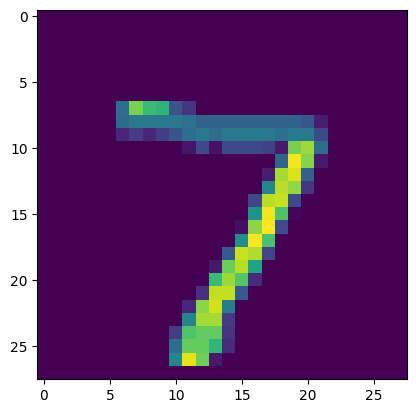

In [10]:
py.imshow(x_test[0])

In [11]:
y_predicted=model.predict(x_test,verbose=False)
print(y_predicted[0])

[4.2255374e-07 7.9503927e-08 4.8312830e-04 4.9659383e-04 1.3882945e-07
 8.1148227e-07 4.5621215e-12 9.9897659e-01 5.7382584e-07 4.1753090e-05]


In [16]:
import numpy as np 
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [14]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    4,    1,    1,    3,    6,    2,    2,    0],
       [   0, 1120,    7,    0,    1,    1,    5,    0,    1,    0],
       [   5,    1, 1010,    2,    1,    0,    5,    4,    4,    0],
       [   0,    0,   12,  976,    0,    9,    0,    3,    5,    5],
       [   3,    0,    0,    1,  956,    0,   10,    2,    2,    8],
       [   2,    0,    0,    2,    1,  871,   12,    0,    3,    1],
       [   4,    2,    1,    1,    1,    5,  942,    0,    2,    0],
       [   0,    7,   24,    3,    9,    1,    0,  960,    2,   22],
       [   3,    0,   12,   10,    4,    6,   13,    1,  920,    5],
       [   3,    8,    5,   11,   13,    5,    1,    3,    3,  957]])>

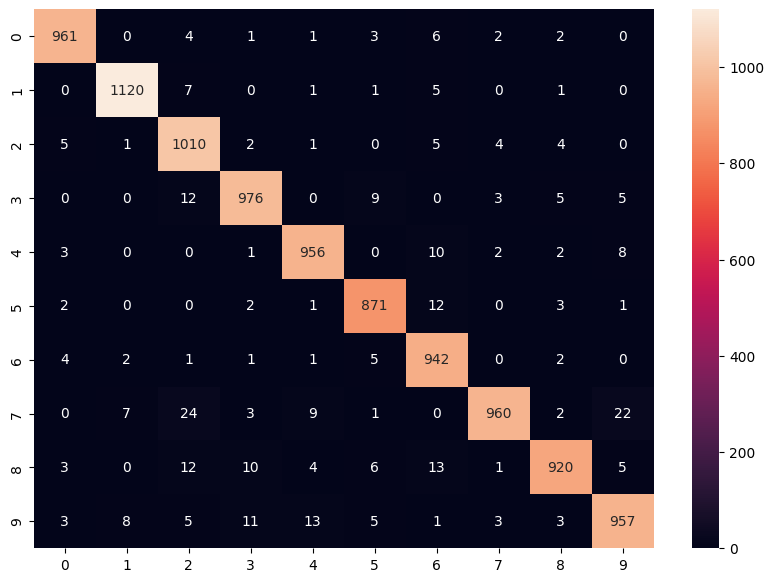

In [22]:
import seaborn as sn
py.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
py.xlabel=('predicted')
py.ylabel=('Truth')